In [5]:
%%html
<style>
.container { width:80% !important; }
</style>

In [6]:
from __future__ import division
import numpy as np
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


Clear signal :

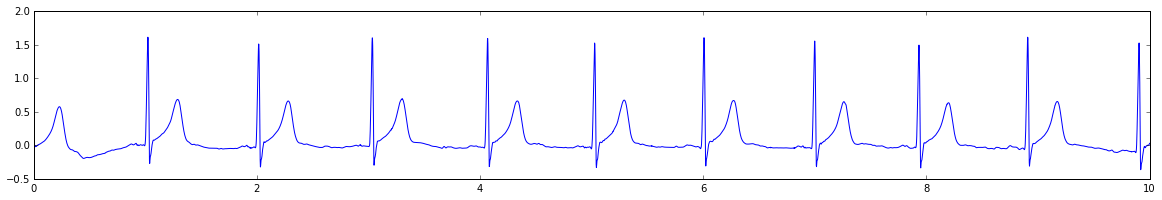

In [7]:
plt.figure(figsize=(20, 3))
X = np.linspace(0, 10, 5000)
Y = np.load("./data/[DE-IDENTIFIED]_#DICOM#_0000A0A5_0926_000E_0926_286321_635440525514417877.dcm.npz")
Y = Y["data"][10]
plt.plot(X, Y)


Noisy signal :

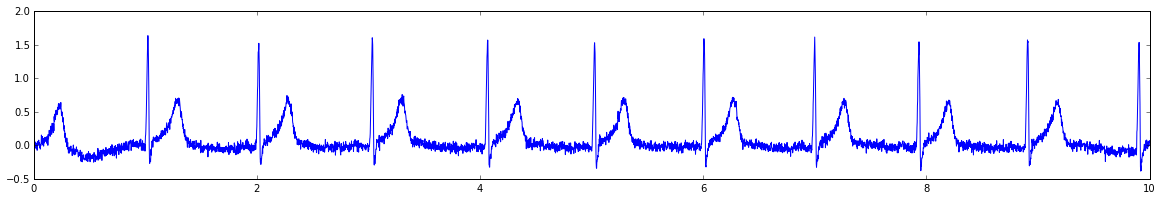

In [8]:
plt.figure(figsize=(20, 3))
sigma = 0.04
Yb = Y + sigma * np.random.standard_normal(len(X))
plt.plot(X, Yb)

In [9]:
import utils
utils.snr(Y, Yb)

16.547714077562585

Débruitage du signal :
 Ici grâce à des ondelettes.   

In [10]:
import pywt

In [11]:
L=8

19.351412823


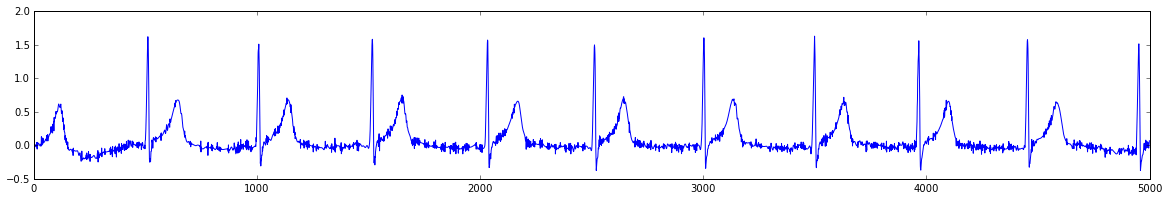

In [12]:
plt.figure(figsize=(20, 3))
Yd = utils.waveFilter(Yb, sigma, L, 1.6)
L=8
plt.plot(Yd)
print utils.snr(Y,Yd)

Détermination des pararamètres optimaux :

0.1


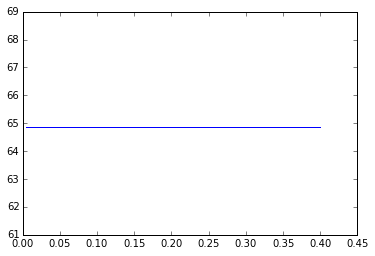

In [13]:
def filt (y, t):
    return utils.waveFilter(y, sigma, L, t)
utils.opt(sigma, filt, Yb)